<a href="https://colab.research.google.com/github/marshmelloyahya/TP2ComputerVision/blob/main/Copie_de_Devoir2_NN_Based_Classifier_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chargement du Dataset**

1.   Importez les bibliothèques nécessaires, y compris PyTorch et les outils de manipulation de données.
2.   Chargez le dataset à partir de la source, par exemple, à partir d'un fichier CSV ou d'une bibliothèque de données PyTorch.

3.   Explorez et visualisez les données pour mieux les comprendre, par exemple, en affichant quelques échantillons ou en traçant des statistiques descriptives.


In [ ]:
# Import des bibliothèques
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [ ]:
# Chargement du dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


100%|██████████| 170498071/170498071 [00:02<00:00, 66428777.96it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Exploration des données
print("Nombre d'échantillons dans l'ensemble d'entraînement:", len(train_dataset))
print("Nombre d'échantillons dans l'ensemble de test:", len(test_dataset))


Nombre d'échantillons dans l'ensemble d'entraînement: 50000
Nombre d'échantillons dans l'ensemble de test: 10000


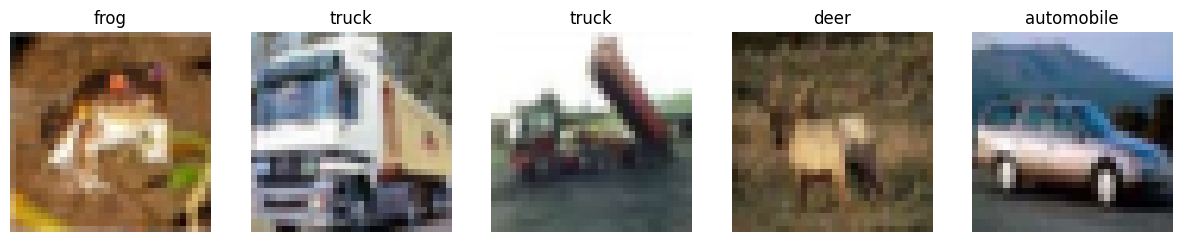

In [ ]:

# Affichage d'échantillons
def show_samples(dataset, classes):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
    for i in range(5):
        sample, label = dataset[i]
        axs[i].imshow(sample.permute(1, 2, 0))
        axs[i].set_title(classes[label])
        axs[i].axis('off')
    plt.show()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
show_samples(train_dataset, classes)

# **Création du Réseau de Neurones**


1.   Définissez l'architecture du réseau de neurones en créant une classe héritant de torch.nn.Module.
2.   Définissez les couches et les opérations à l'intérieur de la classe.
3.   Initialisez les poids du réseau.





In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialisation du réseau
model = SimpleCNN()


# **Choix de la Fonction de Perte et de l'Optimiseur**


1.   Choisissez une fonction de perte appropriée en fonction de la tâche de classification.
2.   Choisissez un optimiseur pour entraîner le réseau de neurones.




In [ ]:
import torch.optim as optim

# Choix de la fonction de perte
criterion = nn.CrossEntropyLoss()

# Choix de l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=0.001)


# **Boucle d'Entraînement**


1.   Définissez la boucle d'entraînement principale qui comprend la propagation avant, le calcul de la perte, la rétropropagation et la mise à jour des poids du réseau.




In [ ]:
 # Création du DataLoader pour l'ensemble d'entraînement
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Boucle d'entraînement
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # Imprimer toutes les 100 mini-lots
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

# Entraînement du modèle en utilisant train_loader
train(model, train_loader, criterion, optimizer)


[1,   100] loss: 2.036
[1,   200] loss: 1.674
[1,   300] loss: 1.511
[1,   400] loss: 1.424
[1,   500] loss: 1.360
[1,   600] loss: 1.350
[1,   700] loss: 1.286
[2,   100] loss: 1.200
[2,   200] loss: 1.177
[2,   300] loss: 1.149
[2,   400] loss: 1.127
[2,   500] loss: 1.086
[2,   600] loss: 1.088
[2,   700] loss: 1.081
[3,   100] loss: 1.018
[3,   200] loss: 1.017
[3,   300] loss: 0.975
[3,   400] loss: 0.994
[3,   500] loss: 0.969
[3,   600] loss: 0.956
[3,   700] loss: 0.957
[4,   100] loss: 0.895
[4,   200] loss: 0.885
[4,   300] loss: 0.869
[4,   400] loss: 0.894
[4,   500] loss: 0.887
[4,   600] loss: 0.870
[4,   700] loss: 0.877
[5,   100] loss: 0.811
[5,   200] loss: 0.805
[5,   300] loss: 0.819
[5,   400] loss: 0.818
[5,   500] loss: 0.808
[5,   600] loss: 0.810
[5,   700] loss: 0.803


# **Évaluation sur l'Ensemble de Test**


1.   Évaluez les performances du modèle sur l'ensemble de test pour comprendre à quel point il généralise bien aux données non vues.




In [ ]:
# Création du DataLoader pour l'ensemble de test
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Évaluation du modèle
def test(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

# Évaluation du modèle en utilisant test_loader
test(model, test_loader)



Accuracy of the network on the 10000 test images: 68 %


**Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


#Get your training and evaluation data

**Datasets and DataLoaders**

In [ ]:
import torchvision
import torchvision.transforms as transforms

batch_size = 512

# Define data transformations
transform = transforms.Compose([
    # transforms.Resize(32),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=2, pin_memory=True,
    # persistent_workers=True,
    # prefetch_factor = 16
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False,
    num_workers=2, pin_memory=True,
    # persistent_workers=True,
    # prefetch_factor = 16
)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))


# List of class labels
classes =[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
    ]

Files already downloaded and verified
Files already downloaded and verified
Num training examples: 50000
Num test examples: 10000


**Visualise some of the dataset images**

In [ ]:
def vect2image(vector):
  '''
   Conversion format vecteur => format image en couleurs
  '''

  image = vector.reshape((3, 32, 32) )
  image = torch.permute( image, dims=(1, 2, 0))
  return image

def image2vector(image): #image : (512, 3, 32, 32)
  '''
   Conversion format vecteur => format image en couleurs
  '''
  # vect =  torch.permute(image, dims=(2, 0, 1))
  vect =  torch.permute(image, dims=(0, 3, 1, 2))
  vect = vect.reshape(-1, 3072)
  return vect

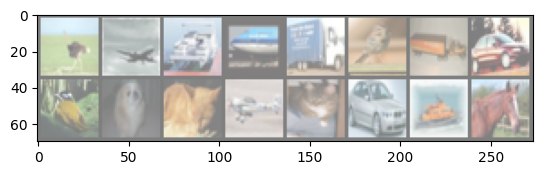

bird -- airplane -- ship -- airplane -- truck -- bird -- truck -- automobile
bird -- dog -- cat -- airplane -- cat -- automobile -- ship -- horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# print(images.shape)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

#Create a model class

**The torch `nn` module**

In [ ]:
class ImageLinearClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(3072,10)

  def forward(self, x): # x:input  3072 px flattened image
    # Computation Graph Construction ....
    x = image2vector(x)#.to(device)
    out = self.layer1(x) # self.layer(x) performs w.T.matmul(x) + b

    # out = nn.ReLU()(out)
    return out

model = ImageLinearClassifier()
model.to(device)


ImageLinearClassifier(
  (layer1): Linear(in_features=3072, out_features=10, bias=True)
)

#Perform forward passes with training data

In [ ]:


print(model.layer1.weight.shape, model.layer1.bias.shape)

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels.shape

out = model(images) # same as model.forward(input) (batch_size, 3072)
print(out)
print(out.shape) # batchsize x output_dim

torch.Size([10, 3072]) torch.Size([10])
tensor([[ 0.1709,  0.0585,  0.3305,  ...,  0.0997,  0.2117, -0.0027],
        [-0.0118, -0.1425,  0.2659,  ..., -0.0604,  0.2733,  0.1690],
        [ 0.3407,  0.2486,  0.1362,  ..., -0.0384,  0.3022,  0.1438],
        ...,
        [ 0.2578,  0.0487,  0.3296,  ...,  0.1420,  0.2397, -0.1693],
        [ 0.3943,  0.0366,  0.1718,  ...,  0.3417,  0.1226,  0.0994],
        [ 0.1424,  0.1679,  0.1853,  ...,  0.1135,  0.1685,  0.1523]],
       grad_fn=<AddmmBackward0>)
torch.Size([8128, 10])


#Set up an optimizer

Let's add a simple loss function

In [ ]:
criterion = nn.CrossEntropyLoss()

# loss = criterion(out, labels)
# print(loss)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # this learning rate is extremely high for Adam btw

In [ ]:
optimizer.zero_grad() # clears the gradients (they're cleared anyway at this point)
# loss.backward() # calculates the gradients
# print(model.layer1.weight.grad, model.layer1.bias.grad) # now we have gradients

In [ ]:
optimizer.step()

**A general PyTorch recipe:**


1.   Get your training and evaluation data
2.   Create a model class
3.   Set up an optimizer
4.   Perform forward passes with training data
5. `optimizer.zero_grad()`
6. `loss.backward()`
7. `optimizer.step()`
8. After few steps of training, evaluate on evaluation data
9. Repeat until loss doesn't decrease or evaluation performance starts to fall off



#Train Loop : Regroupe toutes ces etapes

In [ ]:
import tqdm
num_epochs = 10
for epoch in range(num_epochs):
  running_loss = 0.0
  for i, (images, labels) in enumerate(tqdm.tqdm(train_loader, bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}'), 0):
  # for i in range(len(train_dataset)//batch_size):
    images = images.to(device, non_blocking=True)
    labels= labels.to(device, non_blocking=True)
    # images = torch.rand((batch_size, 3, 32, 32)).to(device, non_blocking=True)
    # labels= torch.rand((batch_size, 10)).to(device, non_blocking=True)
    optimizer.zero_grad()
    out = model(images) #forward pass
    loss = criterion(out, labels)
    loss.backward() #calcul des gradients
    optimizer.step()

    # Update the running loss
    running_loss += loss.item()
  # Print the average loss for this epoch
  avg_loss = running_loss / (i + 1)
  print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")



100%|██████████████████████████████| 98/98 [00:09<00:00, 10.80it/s]


Epoch [1/10], Loss: 1.7007


100%|██████████████████████████████| 98/98 [00:07<00:00, 12.40it/s]


Epoch [2/10], Loss: 1.6908


100%|██████████████████████████████| 98/98 [00:09<00:00,  9.99it/s]


Epoch [3/10], Loss: 1.6961


100%|██████████████████████████████| 98/98 [00:08<00:00, 11.16it/s]


Epoch [4/10], Loss: 1.6962


100%|██████████████████████████████| 98/98 [00:08<00:00, 11.70it/s]


Epoch [5/10], Loss: 1.6970


100%|██████████████████████████████| 98/98 [00:09<00:00, 10.58it/s]


Epoch [6/10], Loss: 1.6889


100%|██████████████████████████████| 98/98 [00:08<00:00, 10.98it/s]


Epoch [7/10], Loss: 1.6857


100%|██████████████████████████████| 98/98 [00:09<00:00, 10.13it/s]


Epoch [8/10], Loss: 1.6912


100%|██████████████████████████████| 98/98 [00:08<00:00, 11.41it/s]


Epoch [9/10], Loss: 1.6827


100%|██████████████████████████████| 98/98 [00:08<00:00, 11.17it/s]

Epoch [10/10], Loss: 1.6801


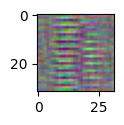

In [ ]:
W = list(model.parameters())
W = W[0]
W = W[7]
W.shape
W_image = vect2image(W)
W_image.shape
W_image = (W_image-W_image.min())/(W_image.max()-W_image.min())

plt.figure(figsize=(1., 1.))
plt.imshow(W_image.cpu().detach())

**Saving and loading models**

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.0035,  0.0213, -0.0020,  ..., -0.0236, -0.0263, -0.0203],
                      [-0.0175, -0.0181, -0.0177,  ...,  0.0315,  0.0239,  0.0045],
                      [-0.0162, -0.0083,  0.0041,  ..., -0.0203, -0.0344, -0.0388],
                      ...,
                      [-0.0242, -0.0208, -0.0146,  ..., -0.0490, -0.0469, -0.0496],
                      [ 0.0752,  0.0443,  0.0180,  ...,  0.1018,  0.0864,  0.0726],
                      [-0.0182, -0.0233, -0.0339,  ...,  0.0095,  0.0022,  0.0520]])),
             ('layer1.bias',
              tensor([-0.3727,  0.2154,  0.1425,  0.1698,  0.1675, -0.1204,  0.2658,  0.0424,
                      -0.3649,  0.0208]))])

In [ ]:
torch.save(model.state_dict(), "model.pt") # saving the model


In [ ]:

new_model = ImageLinearClassifier()
new_model.load_state_dict(torch.load("model.pt")) # loading the model

A couple more useful torch modules that you might find useful for assignments 2 and 3 are `nn.Sequential` and the `Conv2D` module. Check these out in the [PyTorch documentation](https://pytorch.org/docs/stable/index.html)!

#Evaluer sur le Test Dataset

In [ ]:
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
  for i, (images, labels) in enumerate(test_loader, 0):
      images = images.to(device, non_blocking=True)

      labels= labels.to(device, non_blocking=True)
      all_labels.append(labels)

      out = model(images) #forward pass
      all_predictions.append(torch.argmax(out, dim=1))

In [ ]:
all_labels = torch.concat(all_labels)
all_predictions = torch.concat(all_predictions)

In [ ]:
msk = all_labels==all_predictions

accuracy = all_labels[msk].shape[0] / all_labels.shape[0]

print(f"Accuracy: {accuracy}")

Accuracy: 0.4032
